<p style="text-align:center;font-size:30px ;font-weight: bold;"> Gradient Descent Implementation<p/>
<p style="text-align:center;  font-weight: bold;"> Machine Learning Course<p/>
<p style="text-align:center;  line-height: 0px;font-weight: bold;"> Sep 30 2020<p/>

 In this project we trained a linear regression model using gradient descent algorithm. The dataset is the Auto Insurance dataset from this link : 
[Dataset](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html)


## General look at the data
<a id='s1'></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
#read the dataset
data=pd.read_excel("data.xls")

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [4]:
#take a look on the data
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [5]:
# slice the feature and the target lists
feature = np.array(data.X)
target = np.array(data.Y)

# get the dataset size
data_size = len(feature)

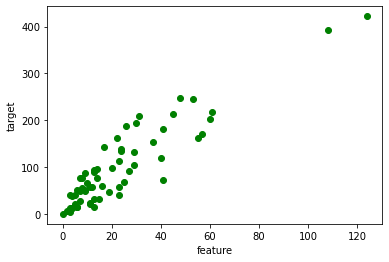

In [6]:
#plotting the data
plt.xlabel("feature")
plt.ylabel("target")
plt.scatter(feature,target,color="green")
plt.show()

In [7]:
#slice the feature column
feature=np.array(data.X)

#slice the target columm
target=np.array(data.Y)

#get the size of our data
data_size=len(feature)

## Find linear regression parameters using gredient descent
<a id='s2'></a>

In [8]:
def is_convarge(old_theta0,old_theta1,new_theta0,new_theta1):
    """check if the distance between the two points (old_theta0,old_theta1) and
        (new_theta0,new_theta1) is small or not to make sure that there is a convergence

    Args:
        new_theta0 (float): new value of theta0
        old_theta0 (float): old value of theta0
        new_theta1 (float): new value of theta1
        old_theta1 (float): old value of theta1

    Returns:
        boolean: if there is a convergence or not
    """
    
    # define a threshold
    threshold = 0.0001
    
    #return the test result as boolean value
    return (math.sqrt((old_theta0 - new_theta0)**2 + (old_theta1 - new_theta1)**2) 
            <= threshold)

In [9]:

def gradient_descent(theta0, theta1, learning_rate):
    """find linear regression parameters (theta0 and theta1)

    Args:
        theta0 (float): the first parameter
        theta1 (float): the second parameter
        learning_rate (float): the second parameter

    Returns:
        tuple : the linear regression parameters (theta0 and theta1),
                did we reach a convergence
                number of iteration until convergence, 
                the changes on thatas on each iteration
    """
    # define the number of iteration as zero
    num_iteration = 0

    # define the convergence flag as false
    reach_converge = False

    # define the changes list on the thetas as empty list
    thetas_changes = []

    # these are values to test if we reach convergence or not
    trash_values = [np.nan, np.inf, np.NINF]
    
    #normalizatin factor
    norm_factor = (1/data_size)
    # repeat until convergence
    while(True):
        # adding the current values of thetas
        thetas_changes.append((theta0, theta1))

        # increase the number of iteration
        num_iteration += 1

        # define the linear regression model which is a list of predicted values of the features
        target_predicted = theta0 + feature * theta1

        # find the new value of theta0
        theta0_changed = theta0 - (learning_rate * norm_factor *
                                   np.sum(target_predicted - target))

        # find the new value of theta1
        theta1_changed = theta1 - (learning_rate * norm_factor *
                                   np.sum((target_predicted - target) * feature))

        # check if we reach convergence or not
        if(theta0_changed in trash_values or theta1_changed in trash_values):
            break

        # check if one of the thetas became a trash value that means there is no convergence
        if(is_convarge(theta0,theta1,theta0_changed,theta1_changed)):
            reach_converge = True
            break

        # edit the values of thetas if they passed the previous test
        theta1, theta0 = theta1_changed, theta0_changed

    # return the results
    return theta0, theta1, num_iteration, reach_converge, thetas_changes


## How to choose the learning rate
<a id='s3'></a>


<p class="alert alert-block alert-info">we need the alfa that gives us the smallest number of iteration.<p/>


In [10]:
# store each alfa with its number of iterations until convergence
iterations_per_alfa = {}

# go out of all alfas and find the number of iterations until convergence
for i in [0.000001, 0.000003, 0.00001, 0.00003, 0.0001, 0.001, 0.1]:

    # call the find_parameters function to get the nubmer of iterations until convergence
    theta0, theta1, num_iteration, reach_converge, thetas_changes = gradient_descent(
        0, 0, i)

    # if at that alfa there was a convergence add it to the dict
    if(reach_converge):

        # add alfa to the dict
        iterations_per_alfa[i] = num_iteration

<ipython-input-8-6d48d64ddd0a>:19: RuntimeWarning: overflow encountered in double_scalars
  return (math.sqrt((old_theta0 - new_theta0)**2 + (old_theta1 - new_theta1)**2)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [11]:
iterations_per_alfa

{1e-06: 3498,
 3e-06: 1523,
 1e-05: 1308,
 3e-05: 72890,
 0.0001: 45688,
 0.001: 9124}

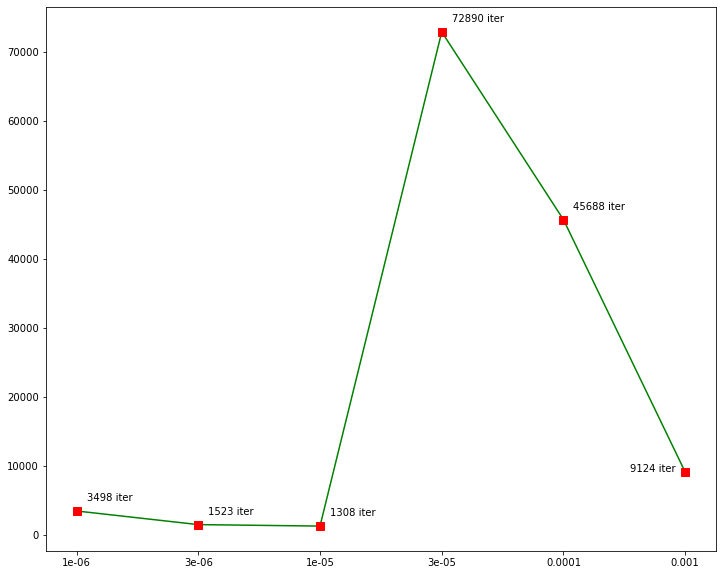

In [12]:
# plotting each alfa with its number of iterations until convergence

# slice the values of alfas and number of iterations
alfa = [str(i) for i in iterations_per_alfa.keys()]
iteration = [i for i in iterations_per_alfa.values()]

# resize the plot
plt.figure(figsize=(12, 10))

# plotting each alfa with its number of iterations until convergence
plt.plot(alfa,
         iteration,
         color='green',
         marker='s',
         mec='red',
         mfc='red',
         ms=8
         )

# set a text on each data point to explain the number of iterations
for x, y in zip(alfa, iteration):

    # define the text
    label = str(y)+" iter"

    # the if steatment is just for the appearance
    if x == alfa[-1]:

        plt.annotate(label,
                     (x, y),
                     textcoords="offset points",
                     xytext=(-10, 0),
                     ha='right')
    else:
        plt.annotate(label,
                     (x, y),
                     textcoords="offset points",
                     xytext=(10, 10),
                     ha='left')


plt.show()

In [13]:
#sort the dict based on the number of iteration to get the optimal alfa
sorted_iterations_per_alfa=sorted(iterations_per_alfa.items(),
                                  key=lambda x: x[1], reverse=False)

In [14]:
sorted_iterations_per_alfa

[(1e-05, 1308),
 (3e-06, 1523),
 (1e-06, 3498),
 (0.001, 9124),
 (0.0001, 45688),
 (3e-05, 72890)]


<p class="alert alert-block alert-danger">we can see from the plot when alfa is 0.00001 we get the smallest number of iteration which means that 0.00001 is the optimal alfa<p/>


## Plotting the results
<a id='s4'></a>

In [51]:
#find the parameters
theta0,theta1,num_iteration,reach_converge,thetas_changes=gradient_descent(0,0,0.00001)

In [52]:
theta0

0.21409783697014628

In [53]:
theta1

3.840925687847562

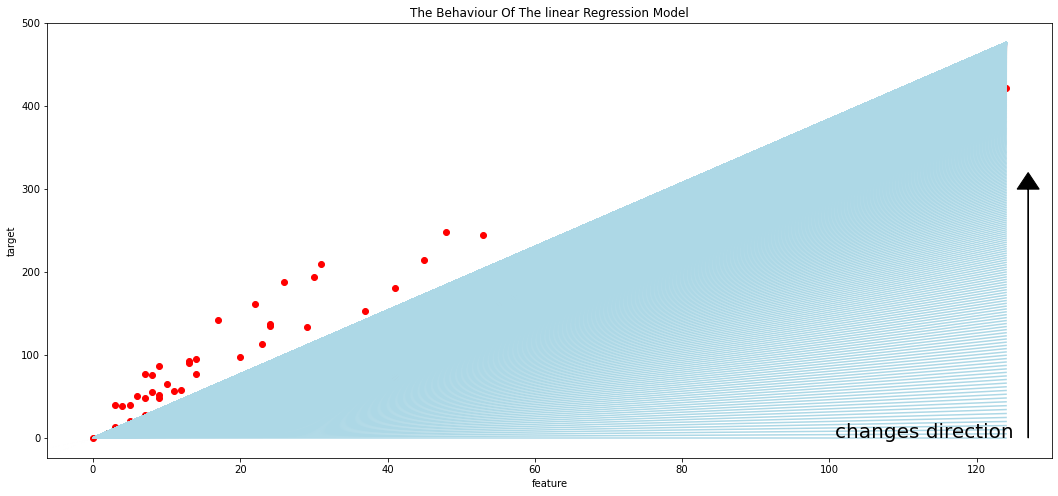

In [119]:
# plotting the behaviour of the linear Regression Model during the fitting processes


# create a range of values between the min and max values in the features
data_range = np.linspace(min(feature), max(feature), 100)

# resize the plot
plt.figure(figsize=(18, 8))

# set titles and labels
plt.title("The Behaviour Of The linear Regression Model")
plt.xlabel("feature")
plt.ylabel("target")

# take the values in each iteration and plot the linear model
for thetas in thetas_changes:

    #thetas[0] is theta0 and thetas[1] is theta1
    linear_model = thetas[0] + thetas[1] * data_range

    # plotting the linear model
    plt.plot(data_range, linear_model, color="lightblue",
             label="Linear Regression Model")

# plotting the original data points
plt.scatter(feature, target, label="Original Data", color="red")

# draw an arrow to show the change direction of the linear model
plt.arrow(127, 0, 0, 300, head_width=3, head_length=20, fc='black', ec='black')

# print the changes directin label
plt.annotate("changes direction",(125,0),textcoords="offset points",xytext=(0, 0),
             ha='right',fontsize=20,color='black')
plt.show()


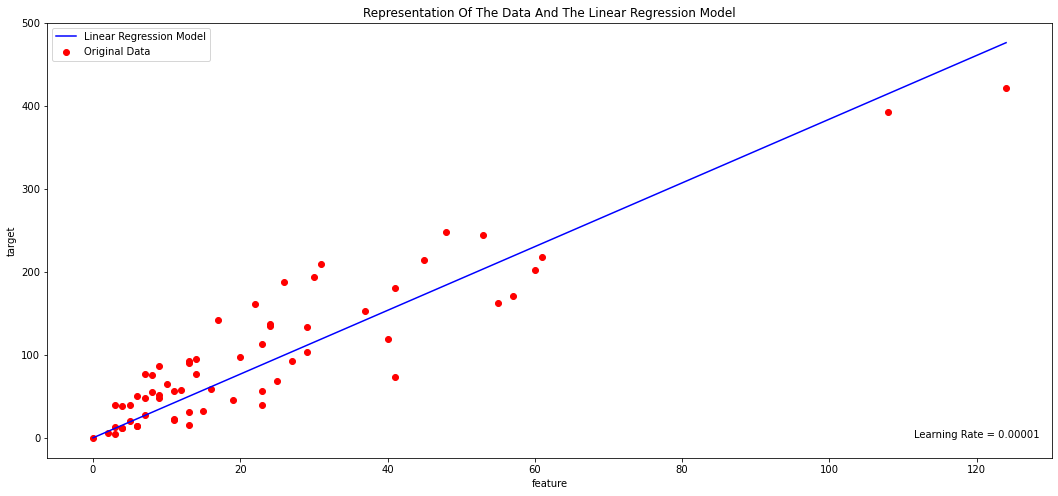

In [120]:
# plotting the original data points and the final linear model

# create a range of values between the min and max values of the features dataset
data_range = np.linspace(min(feature), max(feature), 100)

# define the linear model
linear_model = theta0 + theta1*data_range

# resize the plot
plt.figure(figsize=(18, 8))

# set titles and labels
plt.title("Representation Of The Data And The Linear Regression Model")
plt.xlabel("feature")
plt.ylabel("target")

# plotting the original data points
plt.scatter(feature, target, label="Original Data", color='red')

# plotting the linear model
plt.plot(data_range, linear_model, color="blue",
         label="Linear Regression Model")

# add text to explain the value of alfa
plt.annotate("Learning Rate = 0.00001", xy=(111.5, 0))
plt.legend()
plt.show()
